<a href="https://colab.research.google.com/github/LuigiAjello/Programacao_linear/blob/main/ibmec_pla_devlab09_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DevLab9 - Método de resolução gráfico de problemas de otimização com algoritmos em python e Pulp

In [ ]:
#instalar os pacotes
!pip install Pulp

In [ ]:
#imports das bibliotecas
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#criar o modelo do problema de otimizacao
model = LpProblem("Simple-LpProblem-DevLab9", LpMinimize)


In [ ]:
#Definir as variaveis do problema
x1 =  LpVariable(name="x1", lowBound=0) #"lowbound = 0" significa -> (x,y)> 0

x2 = LpVariable(name="x2", lowBound=0)

In [ ]:
#definir funcao objetiva
funcao_obj = 60*x1 + 40*x2
model += funcao_obj
print(model)


Simple-LpProblem-DevLab9:
MINIMIZE
60*x1 + 40*x2 + 0
VARIABLES
x1 Continuous
x2 Continuous



In [ ]:
# definir as restrições do problema

model += (4*x1 + 4*x2 >= 10, "r1_contraint") ##model.add_constraint(equacao, name)
model += (2*x1 + x2 >= 4, "r2_contraint")
model += (6*x1 + 2*x2 <= 12, "r3_contraint")


In [ ]:
#resolver modelo
status= model.solve()

In [ ]:
#imprime resultados do modelo
print("Status: ", LpStatus[model.status])
#imprime resultados das variaveis do modelo
for variavel in model.variables():
  print(variavel.name,'=',variavel.varValue)

#imprime resultado da Funcao Objetivo
print(f"Objective:{model.objective.value()}")

Status:  Optimal
x1 = 1.5
x2 = 1.0
Objective:130.0


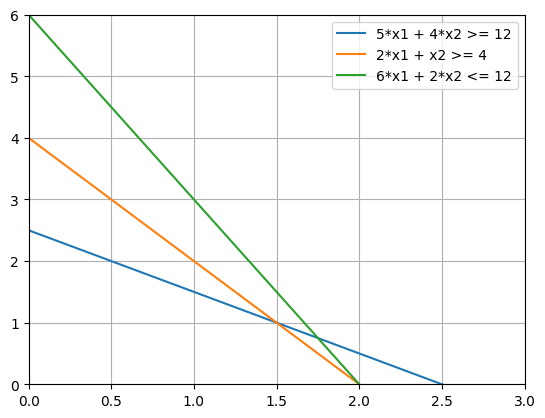

In [ ]:
#constroi e plota o grafico do modelo de otimizacao
x = np.arange(0,4)
plt.plot(x,2.5 - x, label ='5*x1 + 4*x2 >= 12')
plt.plot(x,4 - 2 * x,  label="2*x1 + x2 >= 4" )
plt.plot(x,6 - 3 * x,  label="6*x1 + 2*x2 <= 12" )
plt.axis([0,3,0,6])
plt.grid(True)
plt.legend()
plt.show() #opcional

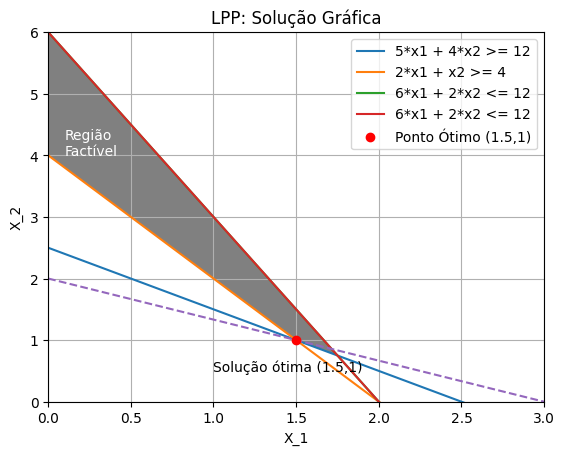

In [ ]:
from ctypes import pointer
#constroi e plota o grafico do modelo de otimizacao
x = np.arange(0,4)
plt.plot(x,2.5 - x, label ='5*x1 + 4*x2 >= 12')
plt.plot(x,4 - 2 * x,  label="2*x1 + x2 >= 4" )
plt.plot(x,6 - 3 * x,  label="6*x1 + 2*x2 <= 12" )
plt.plot(x,6 - 3 * x,  label="6*x1 + 2*x2 <= 12" )
plt.plot(x, 2 - 2/3*x, '--' )

#define as frontreias da area de regiao factivel
x= [0, 1.5, 1.75 , 0]
y= [4,1,0.75,6]

plt.fill(x,y,'grey')

a = plt.text(0.1, 4, 'Região\nFactível', size ='10', color = 'white')
# Adiciona o ponto ótimo
plt.scatter(1.5, 1, color='red', zorder=3, label='Ponto Ótimo (1.5,1)')
plt.annotate('Solução ótima (1.5,1)', xy=(1.5, 1), xytext=(1.0, 0.5)) #coloca um ponto no ponto otimo e escreve um pouco acima para nao tampar



#esvreve labels no grafico
plt.xlabel("X_1")
plt.ylabel("X_2")

#escreve o titul no gráfico
plt.title('LPP: Solução Gráfica')
plt.axis([0,3,0,6])
plt.grid(True)
plt.legend()
plt.show()
